In [25]:
import os
import cv2
import pickle
import seaborn as sns
from tqdm import tqdm
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
from skimage.transform import resize
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
src1 = 'Data/train/flooded/'
src2 = 'Data/train/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

644


In [3]:
# Define parameters for LBP feature extraction
radius = 1
n_points = 8
METHOD = 'uniform'

In [4]:
print(len(image_paths))

644


In [5]:
grey_images = [ [] ] * len(image_paths)
lbp_features = [ [] ] * len(image_paths)
lbp_histograms = [ [] ] * len(image_paths)
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    grey_image = rgb2gray(image)
    grey_image = resize(grey_image, (grey_image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=False)
    grey_images[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features[i] = lbp
    lbp_histograms[i] = hist
    i += 1

  0%|          | 0/644 [00:00<?, ?it/s]/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 644/644 [04:53<00:00,  2.19it/s]


In [6]:
len(lbp_features), lbp_features[0].shape

(644, (200, 200))

In [7]:
# Create a K-means model with 2 clusters
kmeans = KMeans(n_clusters=2)

# Fit the K-means model to the LBP features
kmeans.fit(lbp_histograms)

/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [8]:
# Predict the cluster labels for each image
cluster_labels = kmeans.predict(lbp_histograms)

In [14]:
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [15]:
labels_1 = [1] * 322
labels_2 = [0] * 322
labels = labels_1 + labels_2
len(labels)

644

In [16]:
print(classification_report(labels, cluster_labels))

              precision    recall  f1-score   support

           0       0.87      0.59      0.71       322
           1       0.69      0.91      0.79       322

    accuracy                           0.75       644
   macro avg       0.78      0.75      0.75       644
weighted avg       0.78      0.75      0.75       644



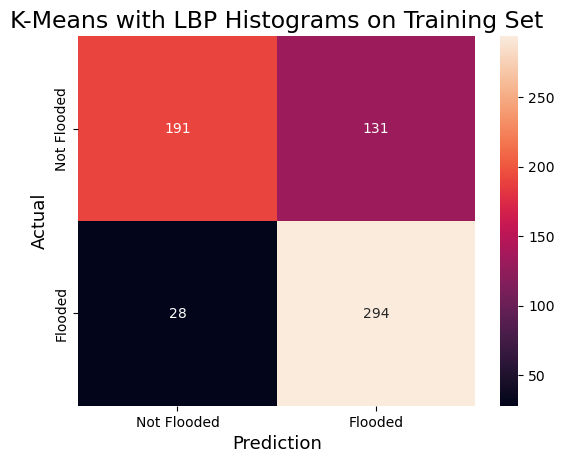

In [35]:
# Compute the confusion matrix.
cm = confusion_matrix(labels, cluster_labels)
# Plot the confusion matrix.
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
# new_labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('K-Means with LBP Histograms on Training Set',fontsize=17)
plt.show()

In [11]:
src1 = 'Data/test/flooded/'
src2 = 'Data/test/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

140


In [12]:
grey_images_test = [ [] ] * len(image_paths)
lbp_features_test = [ [] ] * len(image_paths)
lbp_histograms_test = [ [] ] * len(image_paths)
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    grey_image = rgb2gray(image)
    grey_image = resize(grey_image, (grey_image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=False)
    grey_images_test[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_test[i] = lbp
    lbp_histograms_test[i] = hist
    i += 1

  0%|          | 0/140 [00:00<?, ?it/s]/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 140/140 [01:53<00:00,  1.23it/s]


In [13]:
# Predict the cluster labels for each image
cluster_labels_test = kmeans.predict(lbp_histograms_test)

In [17]:
labels_1 = [1] * 70
labels_2 = [0] * 70
test_labels = labels_1 + labels_2
len(test_labels)

140

In [18]:
print(classification_report(test_labels, cluster_labels_test))

              precision    recall  f1-score   support

           0       0.84      0.61      0.71        70
           1       0.70      0.89      0.78        70

    accuracy                           0.75       140
   macro avg       0.77      0.75      0.75       140
weighted avg       0.77      0.75      0.75       140



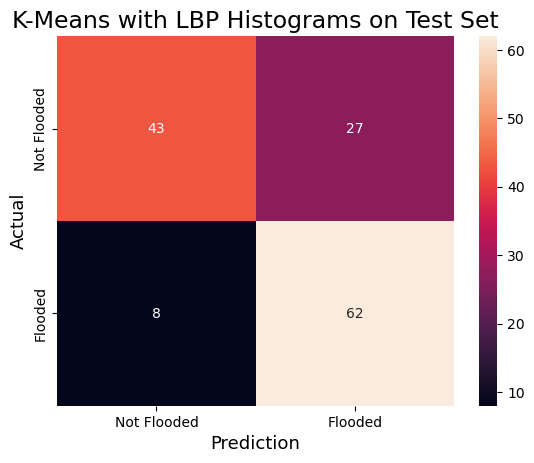

In [34]:
# Compute the confusion matrix.
cm = confusion_matrix(test_labels, cluster_labels_test)
# Plot the confusion matrix.
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
# new_labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('K-Means with LBP Histograms on Test Set',fontsize=17)
plt.show()

In [19]:
src1 = 'Data/val/flooded/'
src2 = 'Data/val/non-flooded/'
image_paths_1 = os.listdir(src1)
image_paths_1 = [src1+ s for s in image_paths_1]
image_paths_2 = os.listdir(src2)
image_paths_2 = [src2+ s for s in image_paths_2]
image_paths = image_paths_1 + image_paths_2
print(len(image_paths))

138


In [20]:
grey_images_val = [ [] ] * len(image_paths)
lbp_features_val = [ [] ] * len(image_paths)
lbp_histograms_val = [ [] ] * len(image_paths)
i = 0
for image_path in tqdm(image_paths):
    image = skimage.io.imread(image_path)
    grey_image = rgb2gray(image)
    grey_image = resize(grey_image, (grey_image.shape[0] // 2, image.shape[1] // 2), anti_aliasing=False)
    grey_images_val[i] = grey_image
    lbp = local_binary_pattern(grey_image, n_points, radius, METHOD)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
    lbp_features_val[i] = lbp
    lbp_histograms_val[i] = hist
    i += 1

  0%|          | 0/138 [00:00<?, ?it/s]/home/iten/anaconda3/envs/bd/lib/python3.11/site-packages/skimage/feature/texture.py:353: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(
100%|██████████| 138/138 [01:46<00:00,  1.30it/s]


In [21]:
# Predict the cluster labels for each image
cluster_labels_val = kmeans.predict(lbp_histograms_val)

In [22]:
labels_1 = [1] * 69
labels_2 = [0] * 69
val_labels = labels_1 + labels_2
len(val_labels)

138

In [23]:
print(classification_report(val_labels, cluster_labels_val))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72        69
           1       0.70      0.86      0.77        69

    accuracy                           0.75       138
   macro avg       0.76      0.75      0.74       138
weighted avg       0.76      0.75      0.74       138



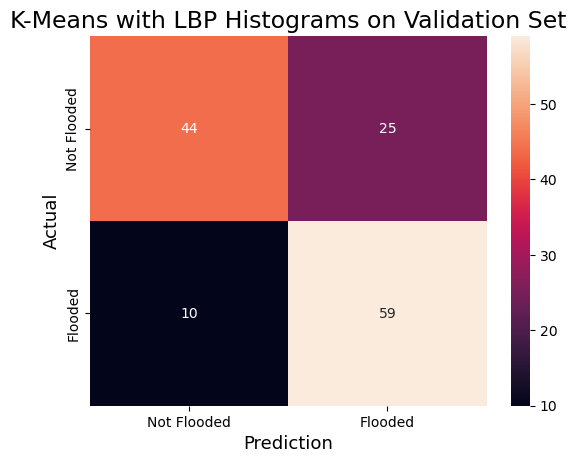

In [36]:
# Compute the confusion matrix.
cm = confusion_matrix(val_labels, cluster_labels_val)
# Plot the confusion matrix.
# Plot the confusion matrix.
new_labels = ["Not Flooded", "Flooded"]
# new_labels.sort()
sns.heatmap(cm, annot=True, fmt='g', xticklabels=new_labels, yticklabels=new_labels)
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('K-Means with LBP Histograms on Validation Set',fontsize=17)
plt.show()